# 마트 오프라인 구매 예측(store analysis)

## 문제상황  

A마트는 주52시간제에 운영으로 인하여 인력난을 겪고 있다. 주 당 판매량을 예측할 수 없기 때문에 근무 스케줄과 인력 운영을 효율적으로  
하기 힘든 상황이다. 대기업 마트가 아니기 때문에 방문자 수, 주차 대수 등 세세한 데이터를 수집할 수 없는 상황이다.
효율적인 인력 운영을 위해서 공공 데이터와 쉽게 구할 수 있는 데이터를 활용하여 주간 마트 판매량 예측을 통해 인력운영을 효율화 하고자 한다.

## 문제 해결 프로세스  

1. 문제정의

- 인력운영 비효율로 인한 운영 비용 상승

2. 기대효과

- 인력운영 효율화로 인한 운영 비용 절감  

3. 해결방안

- 주간 판매량 예측을 통해 인력 운영 스케줄 조정 

4. 성과측정

- 주간 판매량 예측량에 따른 스케줄 조정 후 운영 비용 모니터링

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/USER/Desktop/Practice Project/마트 오프라인 구매 예측/마트 오프라인 구매 예측.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [3]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### 변수 해석 3가지  

1. 결측치 존재 여부

- 전체 데이터에서 모든 변수에 결측치가 존재하지 않는다.

- 결측치의 개수는 전체 5% 미만이면 보통 제거한다.

- 결측치를 대체하는 경우, object형태는 최빈값으로 대체하고, int64, float64형태는 평균으로 대체하거나 KNN을 사용할 수 있다.

2. 데이터 타입 설명

- 종속변수는 float64형태, 독립변수는 object, int64, float64형태로 구성되어 있다. 독립변수 object타입은 날짜를 의미하므로 datetime64형태로 변환해줄 필요가 있어보인다.

3. 컬럼 설명

- Store : 상점 ID
- Date : 날짜
- Weekly_Sales : 주간판매량
- Holiday_Flag : 공휴일여부
- Temperature : 온도
- Fuel_Price : 연료가격
- CPI : 소비자물가지수
- Unemployment : 실업률

In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


우선 describe로 이상치를 판단하기 위해서는 mean, min, max 값을 확인하는 것이 좋다. mean과 min, mean과 max 값이 std에 비해 한참 차이가 난다면, 이상치가 있을 가능성이 높다. 이러한 이상치를 정확히 판단하기 위해서는 아래와 같이 boxplot으로 시각화하여 보는 것이 정확하다.

In [5]:
df_n = df.select_dtypes(exclude = 'object')

In [6]:
outlier = pd.melt(df_n, var_name = '이상치 탐색 변수', value_name = '이상치 탐색 값')
outlier

,이상치 탐색 변수,이상치 탐색 값
0,Store,1.000
1,Store,1.000
2,Store,1.000
3,Store,1.000
4,Store,1.000
...,...,...
45040,Unemployment,8.684
45041,Unemployment,8.667
45042,Unemployment,8.667
45043,Unemployment,8.667


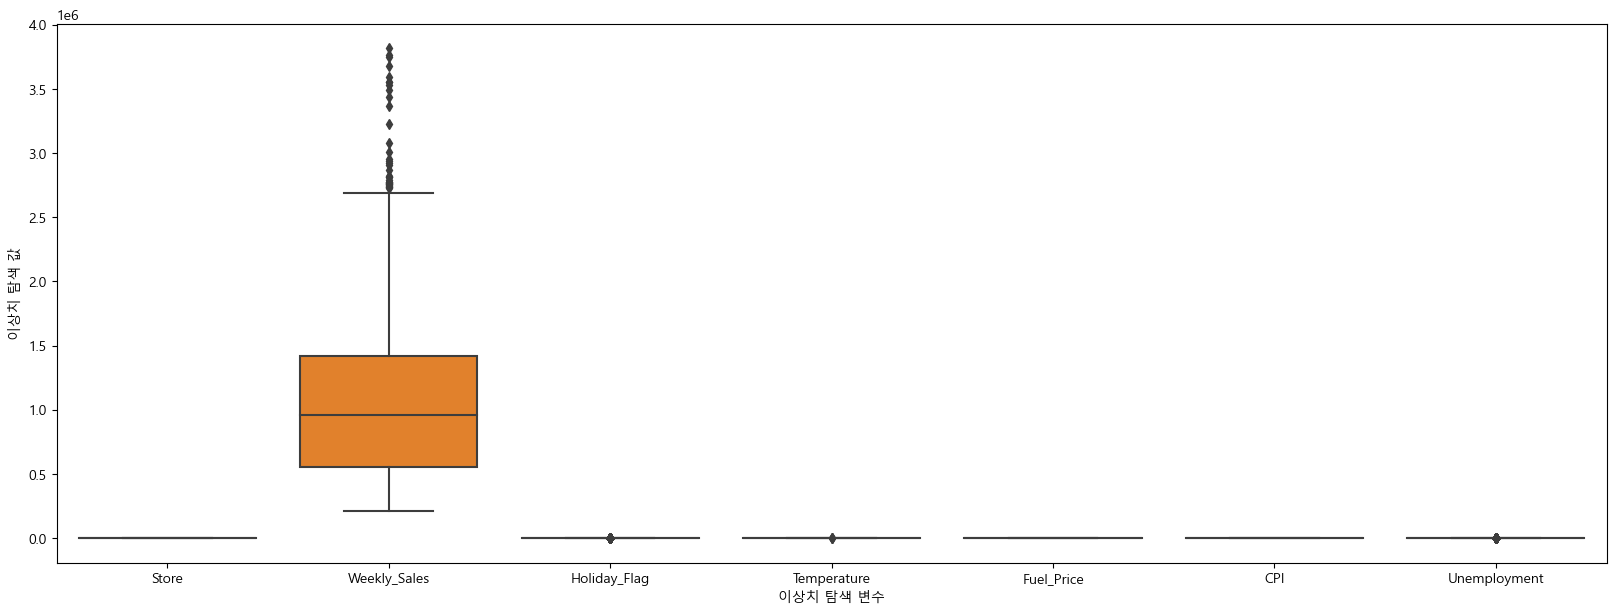

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (20,7))
sns.boxplot(x = '이상치 탐색 변수', y = '이상치 탐색 값', data = outlier)
plt.xticks(range(7), df_n.columns)
plt.show()

이상치를 탐색하기 위해서 수치형 변수들만 선택해서 boxplot으로 시각화하였다. 이상치의 값이 연속적으로 나타나면, 보통 의미있는 값일 확률이 높기 때문에 따로 제거하거나 대체하지 않고, 눈에 띄는 이상치가 있을 경우에는 보통 제거하거나 대체하는 경우가 많다(예를 들어, Age 변수가 999값이 있으면 제거하거나 대체하는 것이 옳다.)

In [9]:
df['Temperature']= (df['Temperature']-32) / 1.8
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,8.055556,2.625,211.350143,8.106


화씨온도에서 섭씨온도로 변환하는 식을 대입해서 한눈에 알아볼 수 있게 만들어준다

In [10]:
df['Temperature'].describe()

count    6435.000000
mean       15.924324
std        10.247185
min       -18.922222
25%         8.588889
50%        17.038889
75%        23.855556
max        37.855556
Name: Temperature, dtype: float64

In [11]:
import datetime
df['Date'] = pd.to_datetime(df['Date'])

Date 변수를 object에서  datatime으로 변경해준다

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### 판매 추이 분석

In [13]:
df['Store'].nunique()

45

In [14]:
df = df.sort_values(by=['Date'])
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
606,5,2010-01-10,283178.12,0,21.722222,2.603,212.226946,6.768
2036,15,2010-01-10,566945.95,0,15.383333,2.840,132.756800,8.067
5897,42,2010-01-10,481523.93,0,30.005556,3.001,126.234600,9.003
4610,33,2010-01-10,224294.39,0,33.027778,3.001,126.234600,9.265
5039,36,2010-01-10,422169.47,0,23.700000,2.567,210.440443,8.476


In [15]:
df['Date'].min(), df['Date'].max() 

(Timestamp('2010-01-10 00:00:00'), Timestamp('2012-12-10 00:00:00'))

2010-01-10 ~ 2012-12-10의 데이터가 존재한다

In [16]:
df1 = df[df['Store']==1].sort_values(by=['Date'])
df1.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
34,1,2010-01-10,1453329.50,0,22.161111,2.603,211.671989,7.838
8,1,2010-02-04,1594968.28,0,16.816667,2.719,210.820450,7.808
21,1,2010-02-07,1492418.14,0,27.172222,2.669,211.223533,7.787
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
30,1,2010-03-09,1540163.53,0,27.338889,2.577,211.531248,7.787
43,1,2010-03-12,1548033.78,0,9.594444,2.708,211.607193,7.838
6,1,2010-03-19,1472515.79,0,12.544444,2.720,211.215635,8.106
7,1,2010-03-26,1404429.92,0,10.805556,2.732,211.018042,8.106
17,1,2010-04-06,1615524.71,0,27.050000,2.705,211.176428,7.808


마트 오프라인 구매를 예측하는 경우, store가 여러개면 모두 같은 정보를 가지고 있을 확률이 거의 없기 때문에 store별 다른 모델을 만들어서 분석해야한다

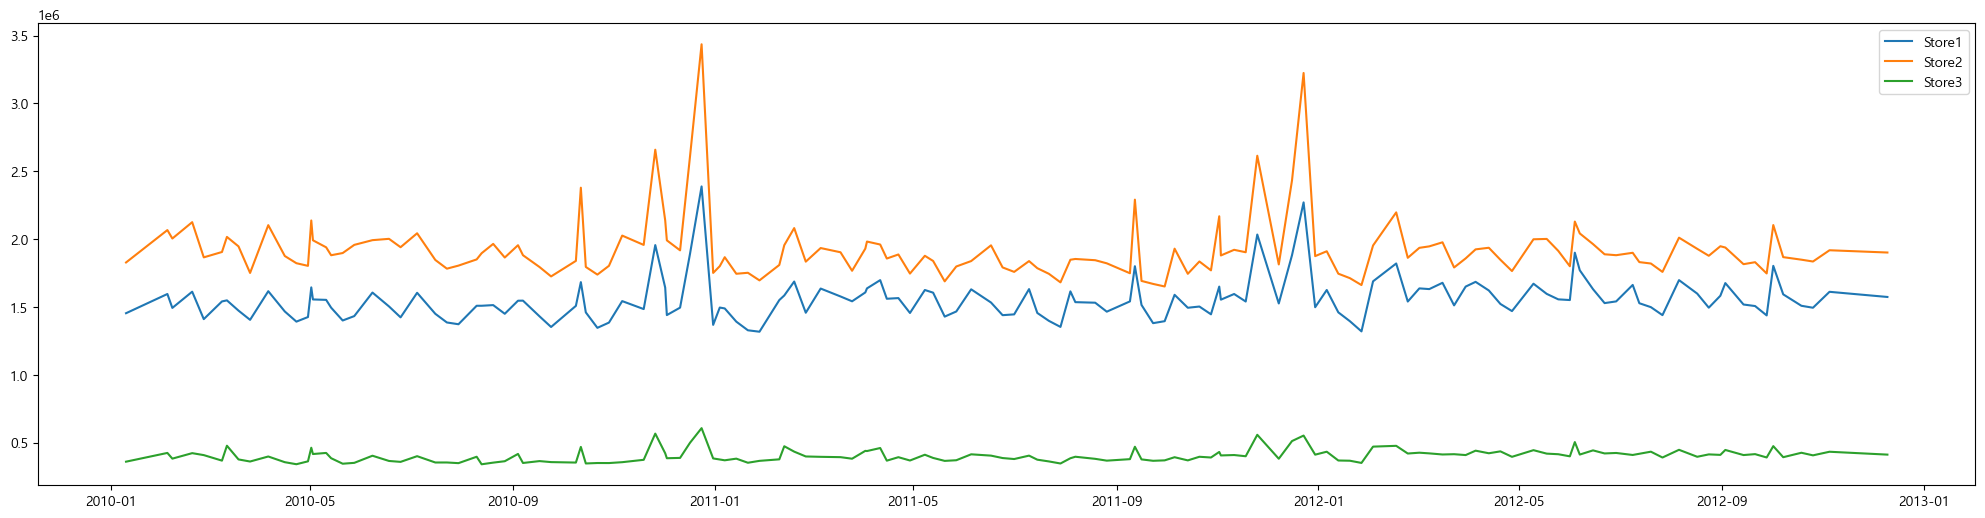

In [17]:
plt.plot(df1['Date'], df1['Weekly_Sales'], label='Store1');
plt.gcf().set_size_inches(25, 6)

df2 = df[df['Store']==2].sort_values(by=['Date'])
plt.plot(df2['Date'], df2['Weekly_Sales'], label='Store2');
plt.gcf().set_size_inches(25, 6)

df3 = df[df['Store']==3].sort_values(by=['Date'])
plt.plot(df3['Date'], df3['Weekly_Sales'], label='Store3');
plt.gcf().set_size_inches(25, 6)

plt.legend()

Sotre별 판매량 수준 추이의 차이가 있기 때문에 독립적인 모델의 생성이 필요하다

In [18]:
df_concat = pd.DataFrame({'Date' : list(df1['Date']) , 
                          'Store1_sales': list(df1['Weekly_Sales']),  
                          'Store2_sales': list(df2['Weekly_Sales']), 
                          'Store3_sales': list(df3['Weekly_Sales'])})
df_concat

,Date,Store1_sales,Store2_sales,Store3_sales
0,2010-01-10,1453329.50,1827440.43,358784.10
1,2010-02-04,1594968.28,2066187.72,423294.40
2,2010-02-07,1492418.14,2003940.64,381151.72
3,2010-02-19,1611968.17,2124451.54,421642.19
4,2010-02-26,1409727.59,1865097.27,407204.86
...,...,...,...,...
138,2012-10-08,1592409.97,1866719.96,391811.60
139,2012-10-19,1508068.77,1847990.41,424513.08
140,2012-10-26,1493659.74,1834458.35,405432.70
141,2012-11-05,1611096.05,1917520.99,431985.36


store1과 store2는 비슷한 주간 판매량이지만 store3는 판매량 수준이 다른 것을 확인할 수 있다

## 변수별 매출 영향도 분석

In [19]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

공휴일에 따른 주간 판매량 평균 차이는 크지 않다

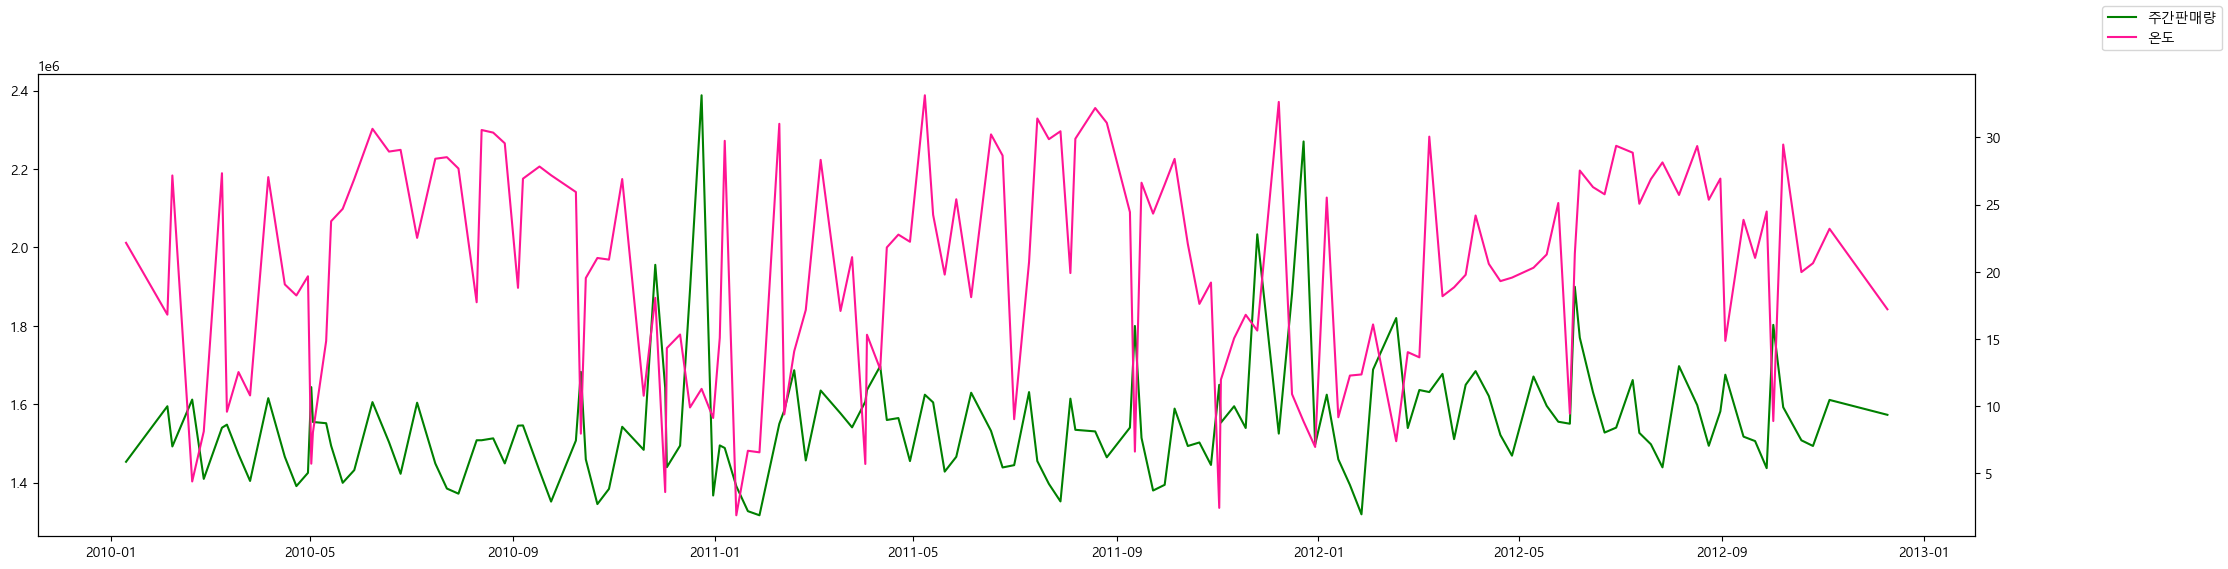

In [21]:
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='주간판매량')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Temperature'], color='deeppink', label='온도')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

온도와 주간 판매량의 상관관계를 확인한다. 온도가 올라가면 판매량이 적어지고 온도가 낮아지면 판매량이 증가하는 약소한 경향을 보인다  

twinx : 이중축으로 그래프를 나타내는 함수

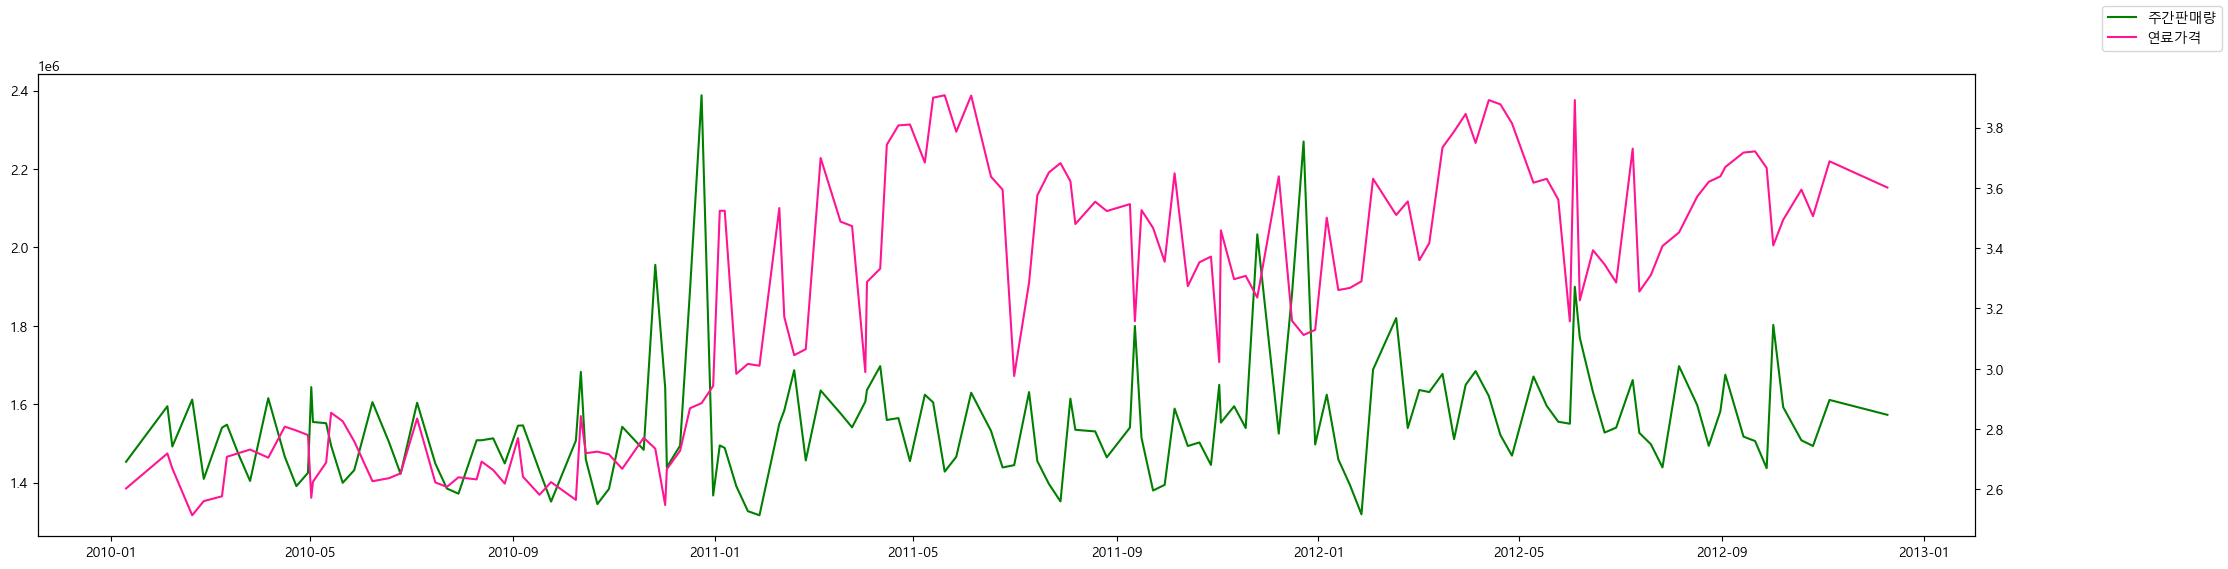

In [23]:
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label= '주간판매량')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Fuel_Price'], color='deeppink', label='연료가격')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

연료 가격과 주간 판매량의 상관관계를 확인한다. 연료가격이 올라가면 주간판매량도 증가하는 약소한 경향을 보인다

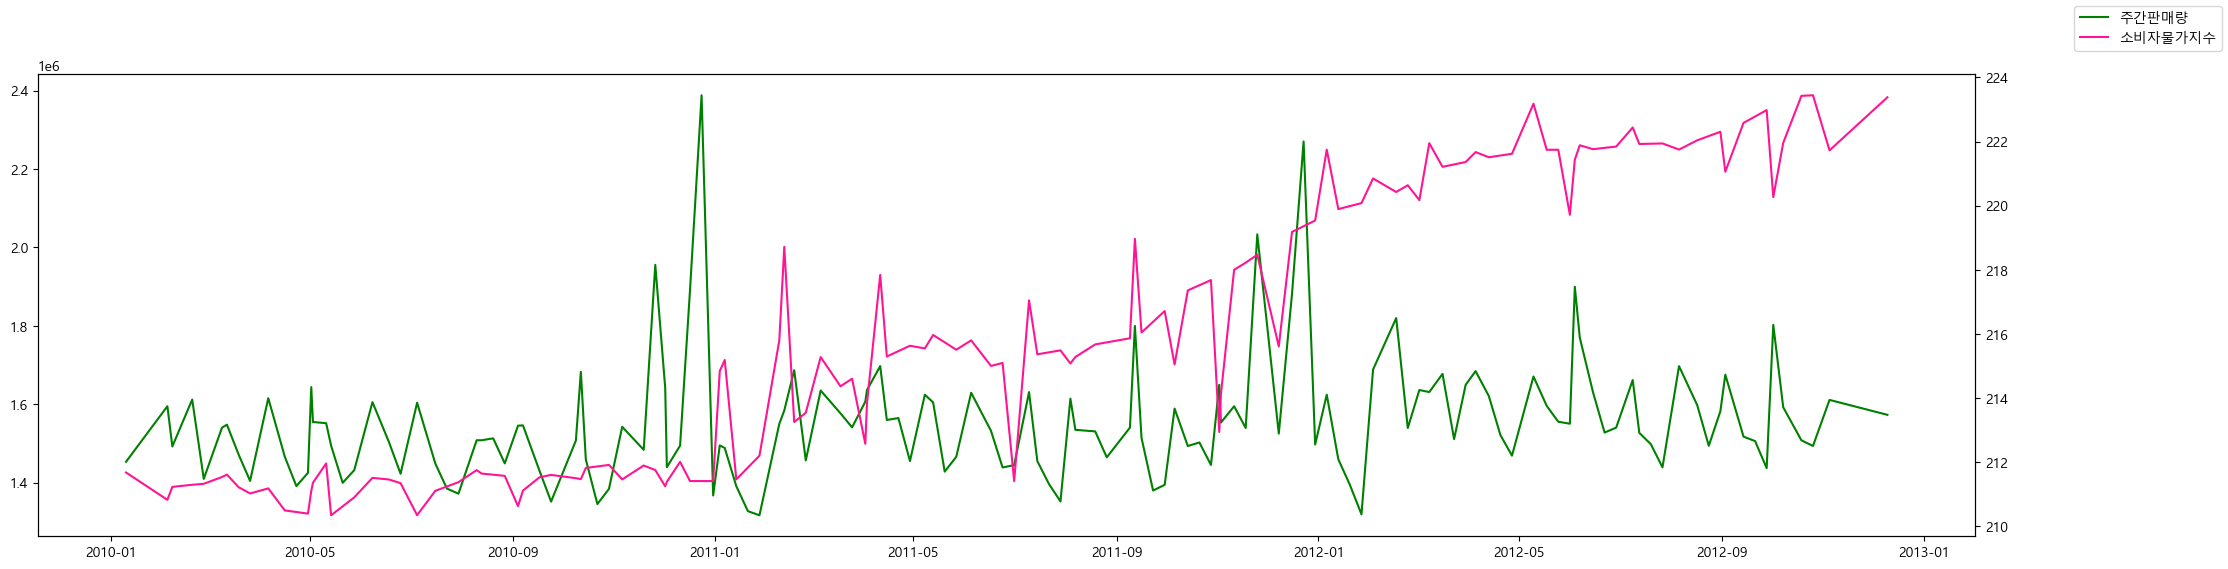

In [24]:
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='주간판매량')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['CPI'], color='deeppink', label='소비자물가지수')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

소비자물가지수와 주간 판매량의 상관관계를 확인한다. 소비자물가지수가 올라가면 주간판매량도 증가하는 약소한 경향을 보인다

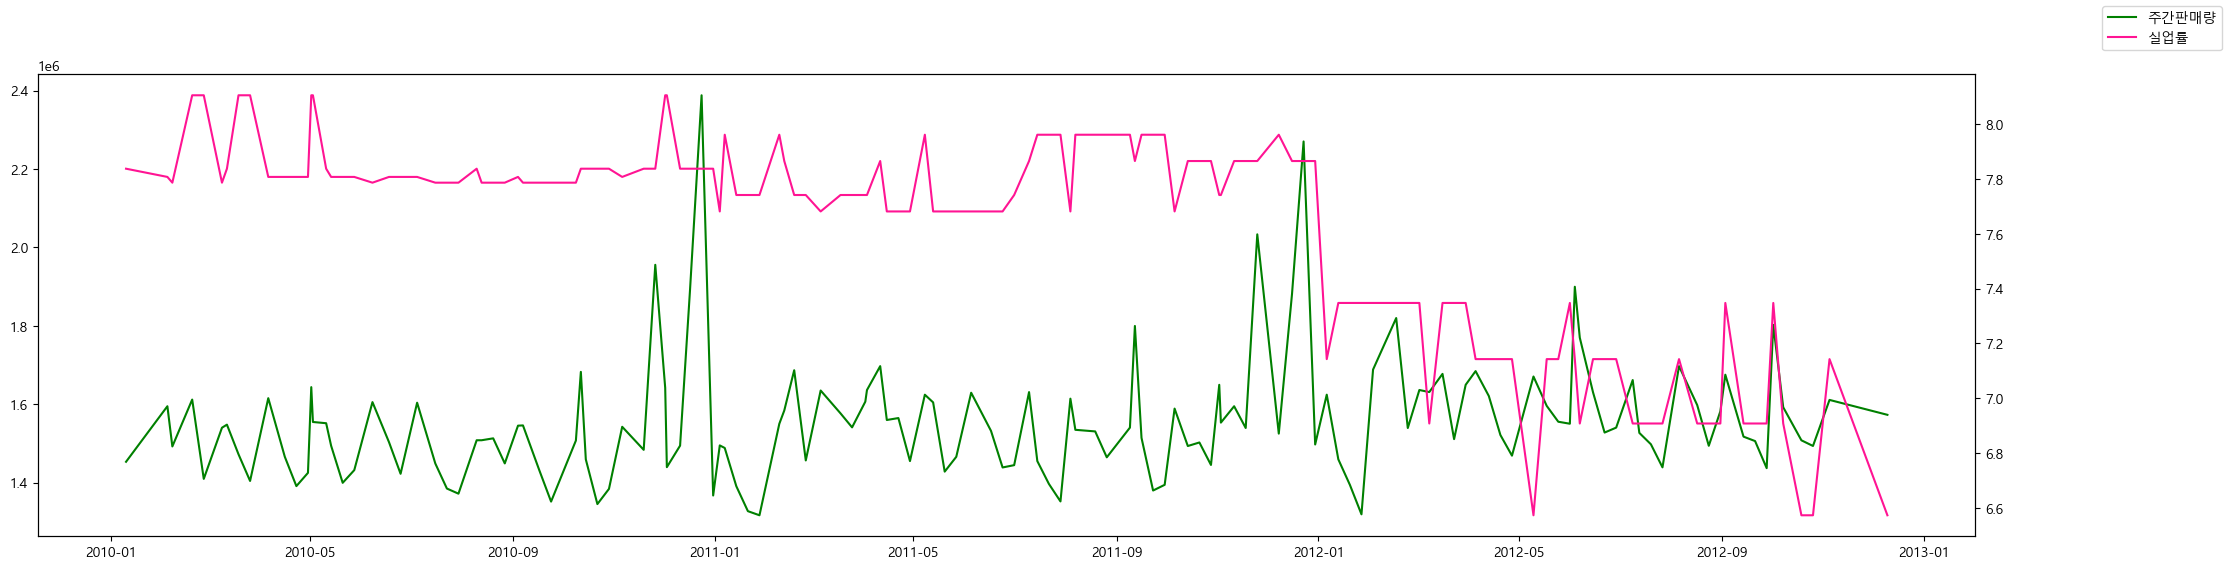

In [25]:
fig, ax1 = plt.subplots()
ax1.plot(df1['Date'], df1['Weekly_Sales'], color='green', label='주간판매량')

ax2 = ax1.twinx()
ax2.plot(df1['Date'], df1['Unemployment'], color='deeppink',label='실업률')

plt.gcf().set_size_inches(25, 6)
fig.legend()
plt.show()

실업률과 주간 판매량의 상관관계를 확인한다. 실업률이 내려가면 주간판매량도 적어지는 약소한 경향을 보인다

In [26]:
df_corr = df1.drop(['Store', 'Holiday_Flag', 'Date'], axis=1)
df_corr.corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.222701,0.124592,0.225408,-0.097955
Temperature,-0.222701,1.000000,0.228493,0.118503,-0.180695
Fuel_Price,0.124592,0.228493,1.000000,0.755259,-0.513944
CPI,0.225408,0.118503,0.755259,1.000000,-0.813471
Unemployment,-0.097955,-0.180695,-0.513944,-0.813471,1.000000


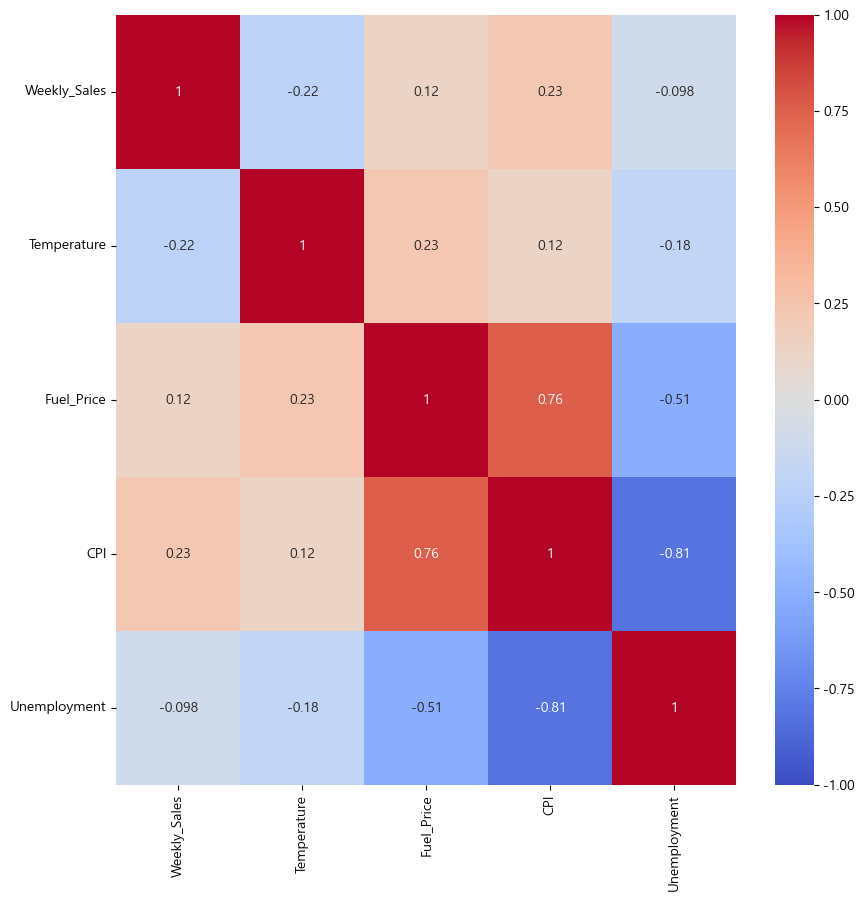

In [27]:
df_corr = df1.drop(['Store', 'Holiday_Flag', 'Date'], axis=1)

sns.heatmap(df_corr.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');
plt.gcf().set_size_inches(10, 10)

주간판매량에 영향을 미치는 변수들만 선택해서 히트맵으로 상관관계 시각화를 진행한다  

주간판매량과 나머지 변수들이 높은 상관성을 가지고 있지 않다. 하지만, 소비자물가지수와 연료가격, 소비자물가지수와 실업률이 높은 상관성을 띄고 있음을 확인할 수 있다

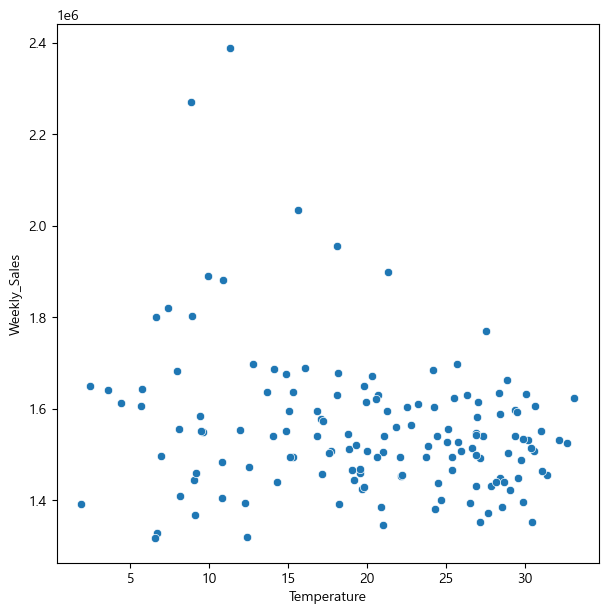

In [29]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df1);
plt.gcf().set_size_inches(7, 7)

온도와 주간 판매량 간의 산점도(Scatter plot)  

상관관계(-0.22)와 같이 온도가 올라가면 주간판매량이 적어지는 약소한 경향을 보인다

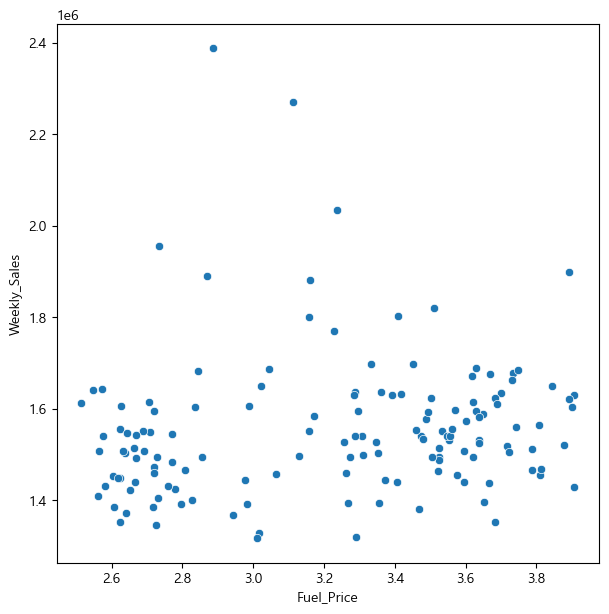

In [30]:
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df1);
plt.gcf().set_size_inches(7, 7)

연료가격과 주간 판매량 간의 산점도(Scatter plot)  

상관관계(0.12)와 같이 연료가격이 올라가면 주간판매량이 증가하는 약소한 경향을 보인다

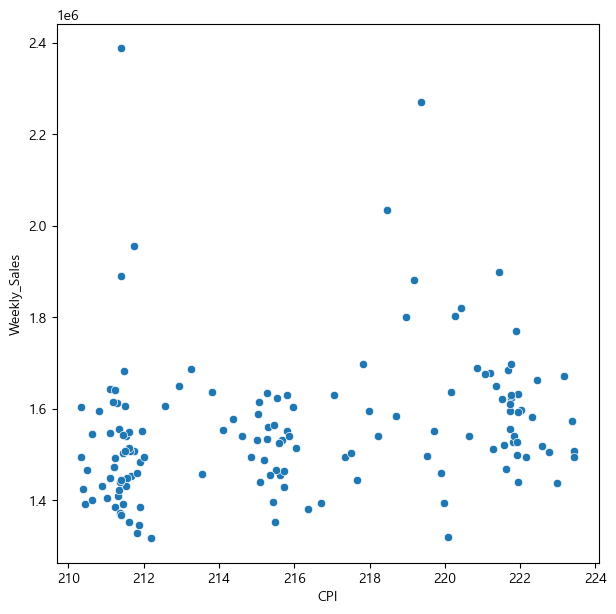

In [31]:
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df1);
plt.gcf().set_size_inches(7, 7)

소비자물가지수와 주간 판매량 간의 산점도(Scatter plot)  

상관관계(0.23)와 같이 소비자물가지수가 올라가면 주간판매량이 증가하는 약소한 경향을 보인다

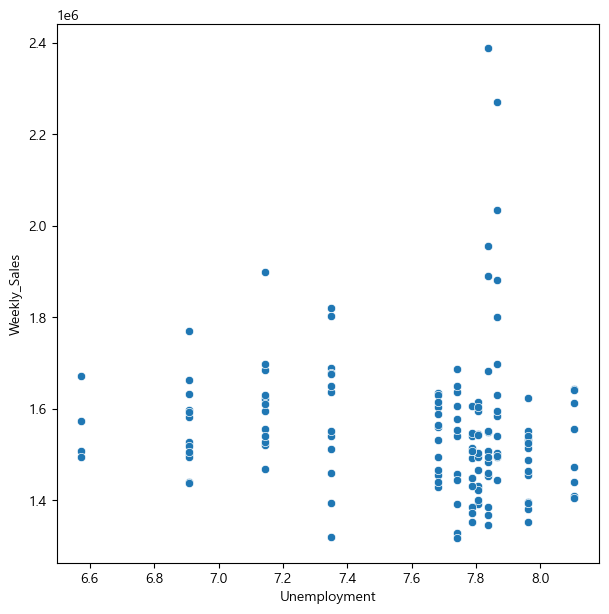

In [28]:
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df1);
plt.gcf().set_size_inches(7, 7)

실업률과 주간 판매량 간의 산점도(Scatter plot)  

상관관계(-0.098)와 같이 실업률이 내려가면 주간판매량도 적어지는 약소한 경향을 보인다. 하지만, 거의 상관관계가 없다고 할 수 있다

## ML 활용 구매량 예측

In [32]:
df1['Dayofweek'] = df1['Date'].dt.dayofweek
df1['month'] = df1['Date'].dt.month
df1.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Dayofweek,month
34,1,2010-01-10,1453329.50,0,22.161111,2.603,211.671989,7.838,6,1
8,1,2010-02-04,1594968.28,0,16.816667,2.719,210.820450,7.808,3,2
21,1,2010-02-07,1492418.14,0,27.172222,2.669,211.223533,7.787,6,2
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,4,2
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,4,2


datetime 변수는 연도별,월별,몇 일 경과 등으로 구분지어서 분석한다. 해당 데이터는 월별, 요일별로 분석을 실시한다

In [33]:
len(df1)

143

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X=df1.drop(['Store', 'Date', 'Weekly_Sales'], axis=1)
Y=df1['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=2023)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(85, 7)
(85,)
(58, 7)
(58,)


이번 test_size를 40%로 설정한 이유는 데이터 수가 너무 적기 때문에 충분한 평가셋을 만들기 위함이다

In [56]:
rfr = RandomForestRegressor(n_estimators=500, max_depth=4, random_state=2023)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=500, random_state=2023)

In [57]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  57033.11696083432
r2_score(r2):  0.7151510799142353

mae_test(mae):  92811.90380624765
r2_score(r2):  0.1947947776461354


r2의 값이 차이가 크므로 과적합이 발생했다고 할 수 있다. 데이터의 수가 너무 적어서 추가 학습이 크게 달라지지 않는다

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_poly = poly.fit_transform(x_train)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

X_test_poly = poly.transform(x_test)

y_pred_test = lin_reg.predict(X_test_poly)


mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)

r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_test(mae):  129221.82378656928
r2_score(r2):  -0.5739827124458001


다항회귀도 성능이 좋지 않음을 알 수 있다. r2_score값이 음수이면 매우 안좋은 모델이라고 할 수 있다

In [59]:
pd.options.display.float_format = '{:.2f}'.format

result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result.head(5)

,Real Values,Predicted Values,diff
23,1448938.92,1449866.77,-927.85
91,1697229.58,1890424.11,-193194.53
32,1430378.67,1383085.21,47293.46
16,1432069.95,1490508.71,-58438.76
97,1881176.67,1581456.91,299719.76


e10 표현을 숫자로 변경해준다

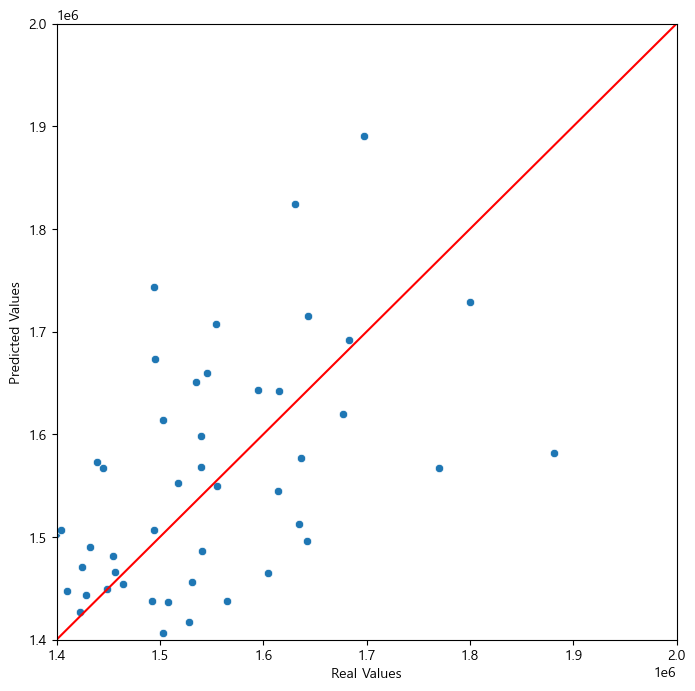

In [60]:
sns.scatterplot(result['Real Values'], result['Predicted Values'])
plt.xlim(1400000, 2000000)
plt.ylim(1400000, 2000000)

x = [1400000, 2000000]
y = [1400000, 2000000]
plt.plot(x, y, color='red')

plt.gcf().set_size_inches(8 ,8)

xlim과 ylim을 조정해서 선형 Fitting이 잘 되는지를 확인한다

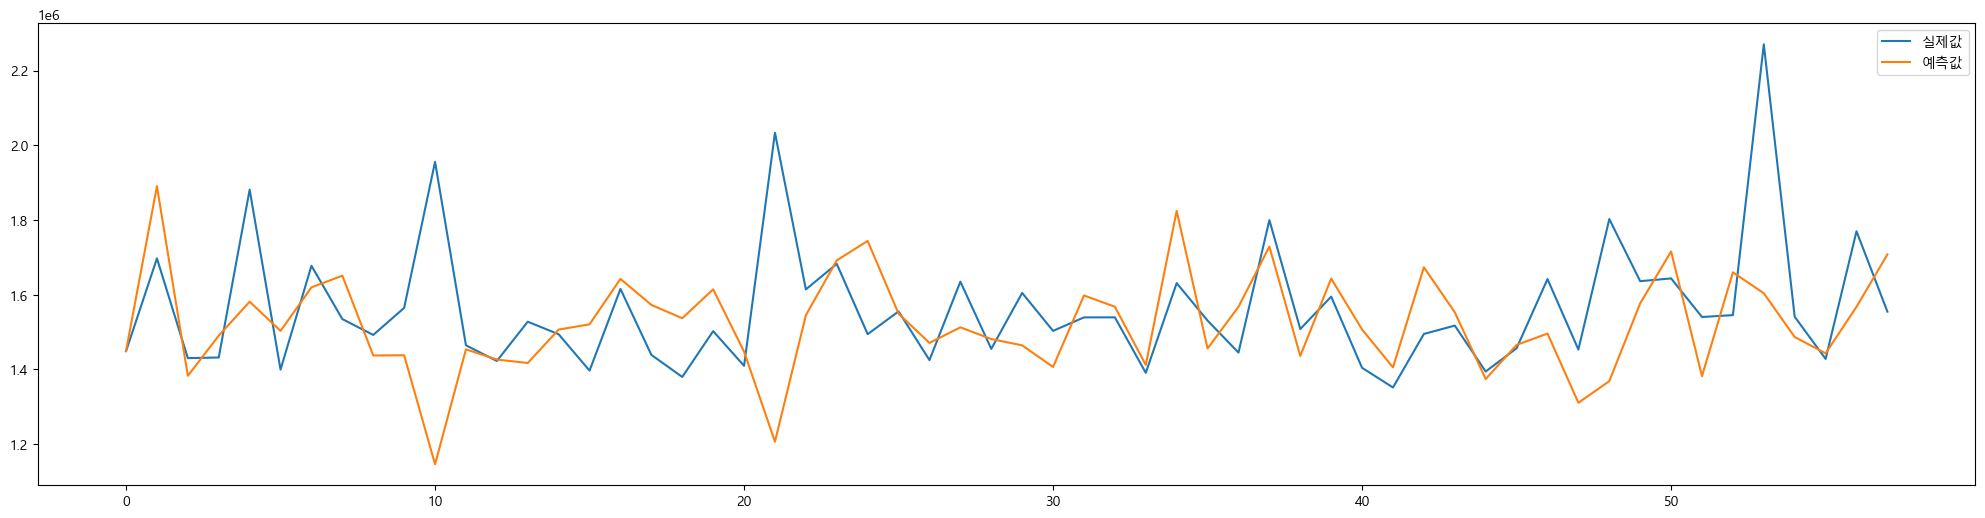

In [61]:
result = result.reset_index(drop=True)

plt.plot(result.index, result['Real Values'], label='실제값');
plt.plot(result.index, result['Predicted Values'], label='예측값');
plt.legend()
plt.gcf().set_size_inches(25, 6)

실제값과 예측값을 Plotting한 결과, 가끔 발생한 peak를 맞추지 못하는 것을 확인할 수 있다. 이러한 이유로 인해 r2값이 매우 작게 나온것을 알 수 있다  

peak를 맞추지 못해 예측력이 현저히 낮아졌다. 월별로 시도해도 peak를 맞추지 못한다면 새로운 변수를 추가해서 모델링하는 방법이나 좋은 월만 선택해 모델을 사용해도 좋다. peak가 발생한 월은 사용하면 안좋아질 확률이 높다

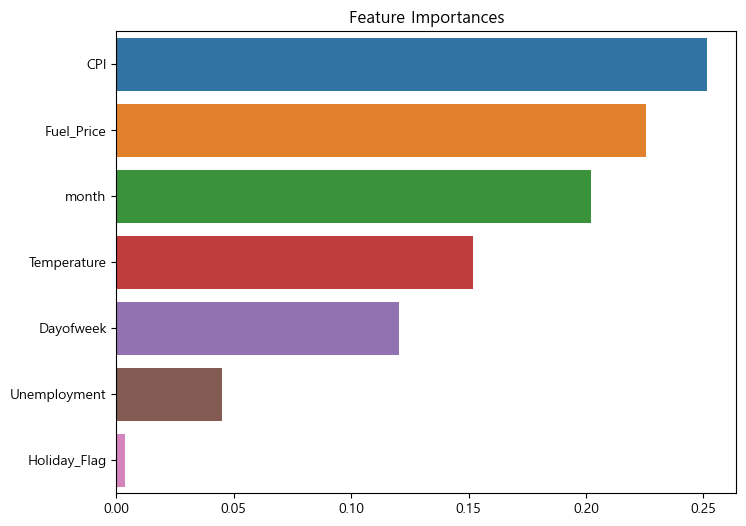

In [62]:
ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

Feature IMP 분석을 통해 중요변수를 파악한다. 위의 상위 변수를 살펴보면, CPI(소비자물가지수)가 구매를 예측하는데 가장 중요한 변수임을 확인할 수 있다. 하지만, Holiday_Flag(공휴일여부)는 예측에 거의 영향을 주지 않는 것을 알 수 있다. 따라서 CPI(소비자물가지수)를 주의 깊게 살펴가면서 예측을 진행하는 것이 좋은 판단이다

Holiday_Flag(공휴일여부)는 제거하고 다시 모델링 해보는 것도 좋다

<AxesSubplot:xlabel='CPI', ylabel='Density'>

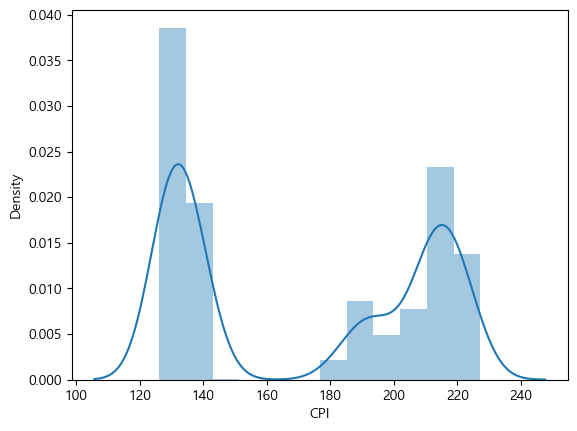

In [63]:
sns.distplot(df['CPI'])

가장 중요한 변수에 대해 상세한 탐색을 실시한다. CPI(소비자물가지수)의 분포를 확인한다

In [64]:
df['CPI'].describe()

count   6435.00
mean     171.58
std       39.36
min      126.06
25%      131.74
50%      182.62
75%      212.74
max      227.23
Name: CPI, dtype: float64

In [65]:
val = 'CPI'

import numpy as np
df['gp'] = np.where (df[val] <= 131.74, 1, 
                           np.where(df[val] <= 212.74, 2, 3))

df[[val,'gp']]

,CPI,gp
606,212.23,2
2036,132.76,2
5897,126.23,1
4610,126.23,1
5039,210.44,2
...,...,...
5860,199.05,2
2285,199.05,2
1427,131.11,1
3572,216.12,3


1사분위수와 3사분위수를 통해 3개의 구간으로 구간화를 진행한다

In [66]:
df.groupby('gp')['Weekly_Sales'].mean().sort_values(ascending = False)

gp
2   1075349.85
1   1062885.29
3    974323.15
Name: Weekly_Sales, dtype: float64

소비자물가지수가 131.74~212.74 사이일 경우, 주간판매량이 가장 높아지는 것을 확인할 수 있다. 따라서, 소비자물가지수를 주의깊게 살펴봐야한다

하지만, 주간 판매량 예측량에 따른 스케줄 조정 후 운영 비용 절감을 위해서는 각 월별, 요일별로 파악하는 것도 중요한 듯 하여 추가 상세 탐색을 실시한다

In [67]:
df1.groupby('month')['Weekly_Sales'].mean().sort_values(ascending=False)

month
12   1724484.72
11   1662623.92
6    1587549.92
2    1584974.27
3    1568646.90
4    1550994.27
8    1541214.15
5    1540130.54
10   1523542.25
9    1510669.48
7    1478138.04
1    1427004.92
Name: Weekly_Sales, dtype: float64

12월에 주간판매량이 가장 높아지는 것을 확인할 수 있다. 따라서, 12월에 인력을 집중시키고 하위 순서대로 스케줄 조정을 하면 비용 절감이 가능할 것이다

In [68]:
df1.groupby('Dayofweek')['Weekly_Sales'].mean().sort_values(ascending=False)

Dayofweek
0   1669668.99
3   1627476.80
2   1599922.07
1   1594145.54
6   1586710.55
5   1546772.22
4   1527640.62
Name: Weekly_Sales, dtype: float64

Dayofweek은 0부터6까지 숫자로 이뤄진 요일이다  

0 : 월요일
1 : 화요일
2 : 수요일
3 : 목요일
4 : 금요일
5 : 토요일
6 : 일요일  

월요일에 주간판매량이 가장 높아지는 것을 확인할 수 있다. 따라서, 월요일에 인력을 집중시키고 하위 순서대로 스케줄 조정을 하면 비용 절감이 가능할 것이다

성과측정은 기본 베이스 코드(위의 전체 코드)를 가지고 익월 데이터를 추가 업로드해서 성과비교가 필요하다. 예를 들어, 위의 데이터로 예측한 주간 판매량에 따른 스케줄 조정 후 운영 비용 모니터링을 통해 전/후 차이를 비교해본다. 매월 운영 비용이 절감되는 금액을 살펴봐야한다